In [ ]:
! pip install inference

## API KEY from Roboflow

In [20]:
from google.colab import userdata
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')

## Define function: `draw_bounding_box`

In [12]:
from PIL import Image
import cv2
import numpy as np

def draw_bounding_box(image_path, result):
    # Read the image using PIL
    image = Image.open(image_path)
    image_np = np.array(image)

    # Extract the predictions
    predictions = result['predictions']

    # Convert PIL image to OpenCV format
    image_cv = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

    for prediction in predictions:
        # Extract bounding box coordinates and other details
        x = int(prediction['x'])
        y = int(prediction['y'])
        width = int(prediction['width'])
        height = int(prediction['height'])
        class_name = prediction['class']
        confidence = prediction['confidence']

        # Calculate the top-left and bottom-right coordinates
        top_left = (x, y)
        bottom_right = (x + width, y + height)

        # Draw the bounding box
        cv2.rectangle(image_cv, top_left, bottom_right, (0, 255, 0), 2)

        # Put the class name and confidence
        label = f"{class_name}: {confidence:.2f}"
        cv2.putText(image_cv, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Convert the image back to RGB format for PIL
    image_with_box = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

    # Convert back to PIL Image
    result_image = Image.fromarray(image_with_box)

    return result_image


## Specimen ID

In [21]:
# import the inference-sdk
from inference_sdk import InferenceHTTPClient

# initialize the client
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key=ROBOFLOW_API_KEY
)

# infer on a local image
result = CLIENT.infer("/content/img5.png", model_id="specimen-di/7")

In [22]:
result

{'time': 0.03580740799998239,
 'image': {'width': 640, 'height': 480},
 'predictions': [{'x': 380.5,
   'y': 319.0,
   'width': 81.0,
   'height': 312.0,
   'confidence': 0.5302231907844543,
   'class': 'yellow',
   'class_id': 3,
   'detection_id': '2b032b38-0471-4d1a-a40a-fa12b6947292'}]}

In [23]:
# Params:
image_path = "/content/img5.png"

# Draw bounding box on the image
result_image = draw_bounding_box(image_path, result)

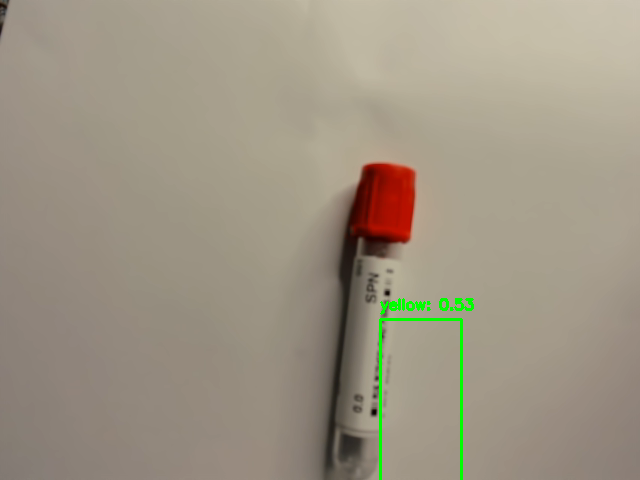

In [24]:
result_image

## Missile Detection

In [25]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key=ROBOFLOW_API_KEY
)

result = CLIENT.infer("/content/Screenshot 2024-06-19 204828.png", model_id="final-missiles/2")

In [26]:
result

{'time': 0.03197382700000162,
 'image': {'width': 1137, 'height': 829},
 'predictions': [{'x': 791.6806640625,
   'y': 152.67333984375,
   'width': 57.73828125,
   'height': 105.4833984375,
   'confidence': 0.7488055229187012,
   'class': 'Missile',
   'class_id': 0,
   'detection_id': 'be09a7e5-be30-4041-aa6c-f5c7bdcca620'}]}

In [27]:
type(result)

dict

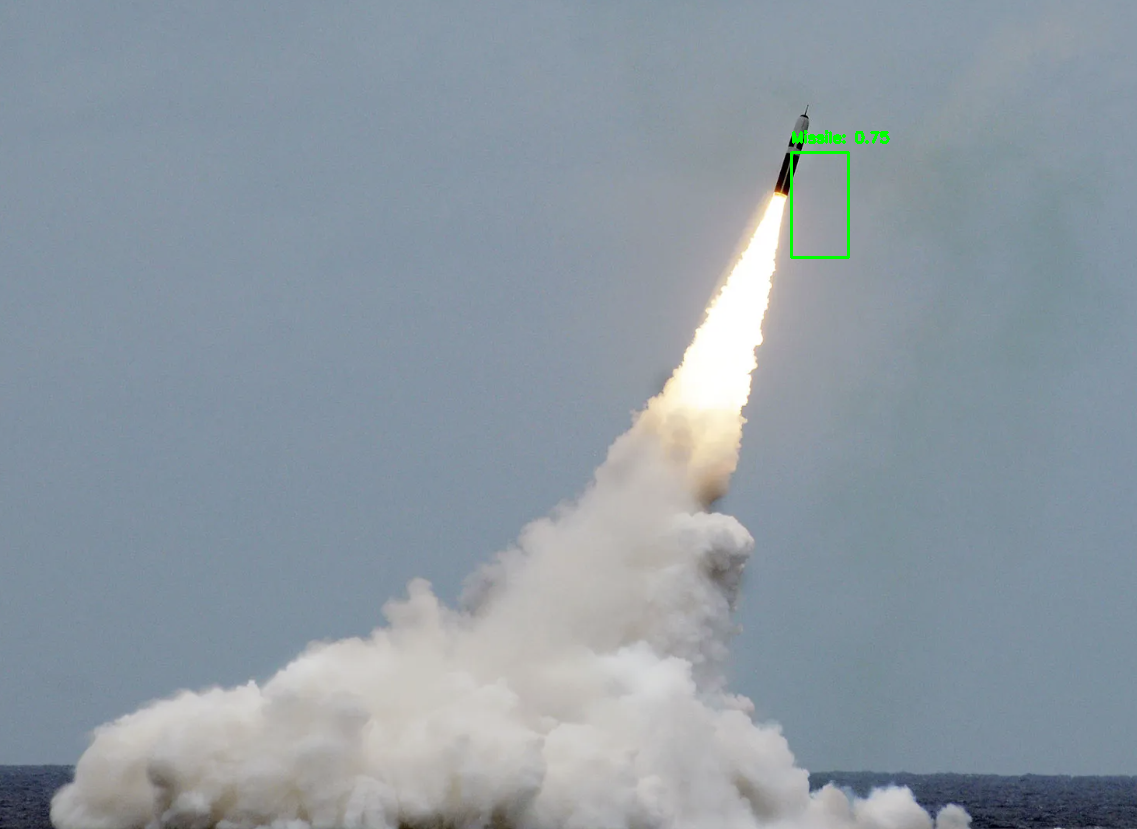

In [28]:
# Params:
image_path = "/content/Screenshot 2024-06-19 204828.png"

# Draw bounding box on the image
result_image = draw_bounding_box(image_path, result)

result_image